# Imports

In [1]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("text-drift-generator"):
    os.chdir("..")
    print(os.getcwd())

c:\Users\manse\OneDrive\Desktop\text-drift-generator


In [2]:
import numpy as np
import pandas as pd
import time
from sklearn.datasets import fetch_20newsgroups

from sentence_transformers import SentenceTransformer

from scripts.enums import WordErrorType
from scripts.preprocess import preprocess_text
from scripts.drift_generator import simulate_drift
from scripts.utils import generate_drifted_text, plot_cosine_similarity_box_plots
from scripts.constants import EXAMPLE_STRING

c:\Users\manse\OneDrive\Desktop\text-drift-generator\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Test simulate error


In [3]:
# Example Usage
text = EXAMPLE_STRING
error_types = [
    WordErrorType.TYPOGRAPHICAL,
    WordErrorType.PHONETIC,
    WordErrorType.MIX,
]

levels = [0.1, 0.5, 0.9]

for error_type in error_types:
    print(f"\nSimulating {error_type} errors:")
    for level in levels:
        drifted_text = simulate_drift(text, error_type, level)
        print(f"Stage {level}: {drifted_text}")


Simulating typographical errors:
Stage 0.1: Artificial intellignce is revolutionizing the way we live and work. It is transforming industries yb automating tasks, impzproving efficiency, and enhancing decision-making. As AI technology evolves, it opens up new possibilities for businesses and individuals avlike. However, challenges remain in ensuring ethical use, data privacy, and fairness. As we move forward, it's crucial to balance innovation with responsibility to maximize the benefits while minimizing ridks.
Stage 0.5: Ahrtifuial intelligence is gevuolutonizing the ay we liv eagnd work. It ist ransforming industqries by automating taaks, improving efficeinc,y ad enhancijg decjsion-makngi. As Au technology evopve,si t opens up new posziblites for vbusinesses and iyndividualss azlgike. However, challengew remain iln ensuring ethical uet, data privacy, gand fairnecss. A we move forward, it's crucial to balance innovaion wigh respjonsibilityv to mazomize the benehfits wile minimizing r

# News dataset


In [4]:
categories = [
    "comp.graphics",
    "rec.autos",
    "rec.sport.baseball",
    "rec.sport.hockey",
    "sci.med",
    "talk.politics.misc",
]

print("Loading 20 newsgroups dataset for categories:")
print(categories)

Loading 20 newsgroups dataset for categories:
['comp.graphics', 'rec.autos', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.med', 'talk.politics.misc']


In [7]:
df = fetch_20newsgroups(
    subset="all",
    categories=categories,
    shuffle=False,
    remove=("headers", "footers", "quotes"),
)

In [5]:
levels = [0.1, 0.5, 0.9]
typo_full_dfs = []
pho_full_dfs = []
mix_full_dfs = []
error_types = [WordErrorType.TYPOGRAPHICAL, WordErrorType.PHONETIC, WordErrorType.MIX]

## Apply drift


In [8]:
for level in levels:
    drifted_df = generate_drifted_text(df=df, error_type=WordErrorType.TYPOGRAPHICAL, level=level, print_info=True)
    typo_full_dfs.append(drifted_df)
    drifted_df = generate_drifted_text(df=df, error_type=WordErrorType.PHONETIC, level=level, print_info=True)
    pho_full_dfs.append(drifted_df)
    drifted_df = generate_drifted_text(df=df, error_type=WordErrorType.MIX, level=level, print_info=True)
    mix_full_dfs.append(drifted_df)

Simulating typographical errors at level 0.1:
Done in 21.238933563232422 s

Simulating phonetic errors at level 0.1:
Done in 18.106303691864014 s

Simulating mix errors at level 0.1:
Done in 20.105807065963745 s

Simulating typographical errors at level 0.5:
Done in 17.017635583877563 s

Simulating phonetic errors at level 0.5:
Done in 16.21663784980774 s

Simulating mix errors at level 0.5:
Done in 19.79531955718994 s

Simulating typographical errors at level 0.9:
Done in 21.21580696105957 s

Simulating phonetic errors at level 0.9:
Done in 19.776913166046143 s

Simulating mix errors at level 0.9:
Done in 24.314263105392456 s



## Vectorize


In [81]:
# Initialize the model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Prepare your data in batches for more efficient encoding
batch_size = 32  # You can adjust this based on your system's capacity

X_drifted_list = []
X_list = []

for i in range(len(levels)):
    print(f"start vectorizing typographical original {levels[i]}")
    # Encode in batches
    original_data = typo_full_dfs[i].original_preprocessed_data
    X = model.encode(original_data, batch_size=batch_size, show_progress_bar=True, device='cpu')  # Ensure CPU usage
    X_list.append(X)
    np.savetxt(f'data/drifted_data/typographical/original_{levels[i]}.csv', X, delimiter=',')

    print(f"start vectorizing typographical drifted {levels[i]}")
    # Encode drifted data in batches
    drifted_data = typo_full_dfs[i].drifted_preprocessed_data
    X_drifted = model.encode(drifted_data, batch_size=batch_size, show_progress_bar=True, device='cpu')  # Ensure CPU usage
    X_drifted_list.append(X_drifted)
    np.savetxt(f'data/drifted_data/typographical/drifted_{levels[i]}.csv', X_drifted, delimiter=',')

    print(f"start vectorizing phonetic original {levels[i]}")
    # Encode in batches
    original_data = pho_full_dfs[i].original_preprocessed_data
    X = model.encode(original_data, batch_size=batch_size, show_progress_bar=True, device='cpu')  # Ensure CPU usage
    X_list.append(X)
    np.savetxt(f'data/drifted_data/phonetic/original_{levels[i]}.csv', X, delimiter=',')

    print(f"start vectorizing phonetic drifted {levels[i]}")
    # Encode drifted data in batches
    drifted_data = pho_full_dfs[i].drifted_preprocessed_data
    X_drifted = model.encode(drifted_data, batch_size=batch_size, show_progress_bar=True, device='cpu')  # Ensure CPU usage
    X_drifted_list.append(X_drifted)
    np.savetxt(f'data/drifted_data/phonetic/drifted_{levels[i]}.csv', X_drifted, delimiter=',')

    print(f"start vectorizing mix original {levels[i]}")
    # Encode in batches
    original_data = mix_full_dfs[i].original_preprocessed_data
    X = model.encode(original_data, batch_size=batch_size, show_progress_bar=True, device='cpu')  # Ensure CPU usage
    X_list.append(X)
    np.savetxt(f'data/drifted_data/mix/original_{levels[i]}.csv', X, delimiter=',')

    print(f"start vectorizing mix drifted {levels[i]}")
    # Encode drifted data in batches
    drifted_data = mix_full_dfs[i].drifted_preprocessed_data
    X_drifted = model.encode(drifted_data, batch_size=batch_size, show_progress_bar=True, device='cpu')  # Ensure CPU usage
    X_drifted_list.append(X_drifted)
    np.savetxt(f'data/drifted_data/mix/drifted_{levels[i]}.csv', X_drifted, delimiter=',')

start vectorizing typographical original 0.1


Batches: 100%|██████████| 173/173 [01:47<00:00,  1.61it/s]


start vectorizing typographical drifted 0.1


Batches: 100%|██████████| 173/173 [01:51<00:00,  1.56it/s]


start vectorizing phonetic original 0.1


Batches: 100%|██████████| 173/173 [01:48<00:00,  1.60it/s]


start vectorizing phonetic drifted 0.1


Batches: 100%|██████████| 173/173 [01:46<00:00,  1.62it/s]


start vectorizing mix original 0.1


Batches: 100%|██████████| 173/173 [01:44<00:00,  1.66it/s]


start vectorizing mix drifted 0.1


Batches: 100%|██████████| 173/173 [01:48<00:00,  1.59it/s]


start vectorizing typographical original 0.5


Batches: 100%|██████████| 173/173 [01:50<00:00,  1.57it/s]


start vectorizing typographical drifted 0.5


Batches: 100%|██████████| 173/173 [02:04<00:00,  1.39it/s]


start vectorizing phonetic original 0.5


Batches: 100%|██████████| 173/173 [01:59<00:00,  1.45it/s]


start vectorizing phonetic drifted 0.5


Batches: 100%|██████████| 173/173 [02:35<00:00,  1.11it/s]


start vectorizing mix original 0.5


Batches: 100%|██████████| 173/173 [02:42<00:00,  1.07it/s]


start vectorizing mix drifted 0.5


Batches: 100%|██████████| 173/173 [02:49<00:00,  1.02it/s]


start vectorizing typographical original 0.9


Batches: 100%|██████████| 173/173 [02:42<00:00,  1.06it/s]


start vectorizing typographical drifted 0.9


Batches: 100%|██████████| 173/173 [03:22<00:00,  1.17s/it]


start vectorizing phonetic original 0.9


Batches: 100%|██████████| 173/173 [02:49<00:00,  1.02it/s]


start vectorizing phonetic drifted 0.9


Batches: 100%|██████████| 173/173 [02:37<00:00,  1.10it/s]


start vectorizing mix original 0.9


Batches: 100%|██████████| 173/173 [02:42<00:00,  1.07it/s]


start vectorizing mix drifted 0.9


Batches: 100%|██████████| 173/173 [03:01<00:00,  1.05s/it]


## Evaluate


In [82]:
# Import the numpy arrays containing original and drifted data

levels = [0.1, 0.5, 0.9]

X_typo_list = []
X_typo_drifted_list = []
X_pho_list = []
X_pho_drifted_list = []
X_mix_list = []
X_mix_drifted_list = []

for level in levels:
    X = np.genfromtxt(f'data/drifted_data/typographical/original_{level}.csv', delimiter=',')
    X_typo_list.append(X)
    X_drifted = np.genfromtxt(f'data/drifted_data/typographical/drifted_{level}.csv', delimiter=',')
    X_typo_drifted_list.append(X_drifted)

    X = np.genfromtxt(f'data/drifted_data/phonetic/original_{level}.csv', delimiter=',')
    X_pho_list.append(X)
    X_drifted = np.genfromtxt(f'data/drifted_data/phonetic/drifted_{level}.csv', delimiter=',')
    X_pho_drifted_list.append(X_drifted)

    X = np.genfromtxt(f'data/drifted_data/mix/original_{level}.csv', delimiter=',')
    X_mix_list.append(X)
    X_drifted = np.genfromtxt(f'data/drifted_data/mix/drifted_{level}.csv', delimiter=',')
    X_mix_drifted_list.append(X_drifted)

Average Cosine Similarity at level 0.1: 0.9291
Average Cosine Similarity at level 0.5: 0.6633
Average Cosine Similarity at level 0.9: 0.4686


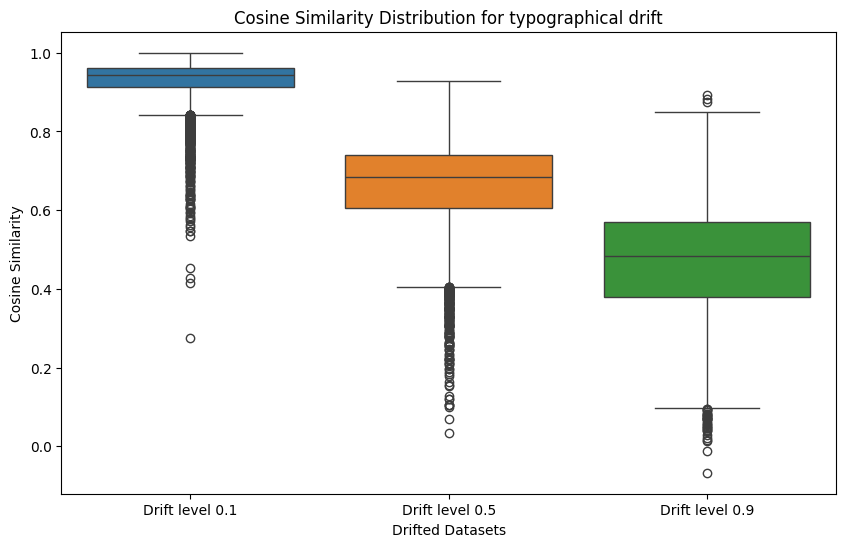

Average Cosine Similarity at level 0.1: 0.9777
Average Cosine Similarity at level 0.5: 0.8521
Average Cosine Similarity at level 0.9: 0.7092


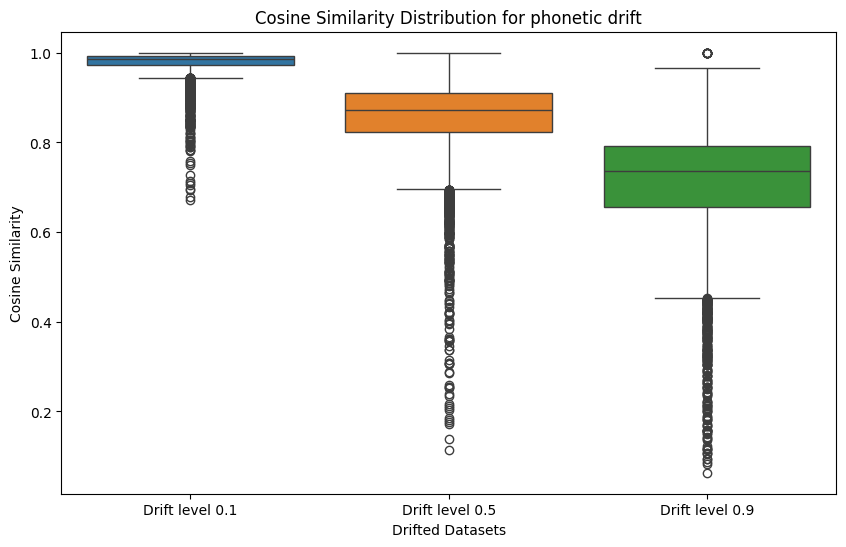

Average Cosine Similarity at level 0.1: 0.9347
Average Cosine Similarity at level 0.5: 0.7848
Average Cosine Similarity at level 0.9: 0.6120


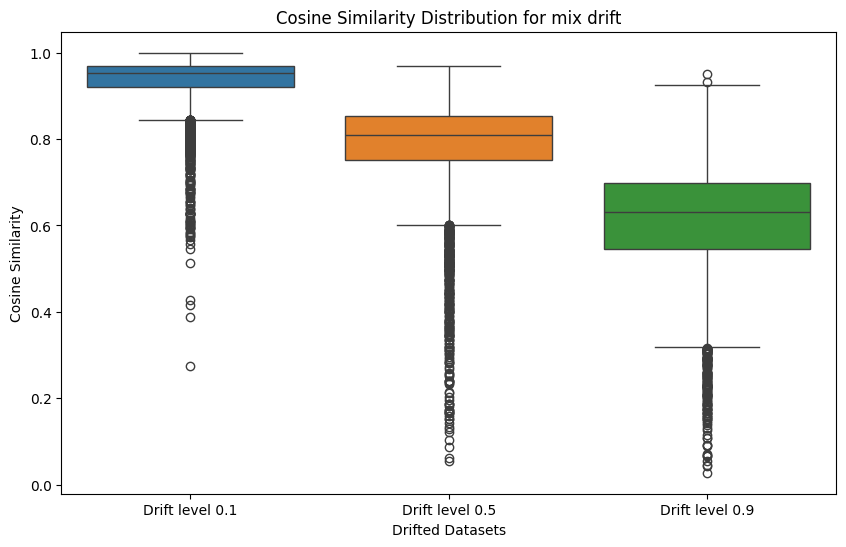

In [83]:
plot_cosine_similarity_box_plots(
    levels=levels,
    error_type=WordErrorType.TYPOGRAPHICAL,
    X_list=X_typo_list,
    X_drifted_list=X_typo_drifted_list,
)
plot_cosine_similarity_box_plots(
    levels=levels,
    error_type=WordErrorType.PHONETIC,
    X_list=X_pho_list,
    X_drifted_list=X_pho_drifted_list,
)
plot_cosine_similarity_box_plots(
    levels=levels,
    error_type=WordErrorType.MIX,
    X_list=X_mix_list,
    X_drifted_list=X_mix_drifted_list,
)

In [84]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load pre-trained T5 model and tokenizer
model_name = "t5-small"  # You can also try "t5-base" or "t5-large"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

def formalize_text(text):
    """
    Convert informal text to formal using the T5 model.
    """
    # Define the prompt for translation
    prompt = f"translate English to Formal English: {text}"
    
    # Tokenize the input text
    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True)
    
    # Generate formal text
    outputs = model.generate(inputs.input_ids, max_length=100, num_return_sequences=1)
    
    # Decode the generated text
    formal_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    return formal_text

# Example usage
text = "yeah, u wanna go out? btw idk if it's cool."
formal_text = formalize_text(text)
print(f"Formalized Text: {formal_text}")


ImportError: 
T5Tokenizer requires the SentencePiece library but it was not found in your environment. Checkout the instructions on the
installation page of its repo: https://github.com/google/sentencepiece#installation and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.
